# Decision Tree 

A decision tree is a flowchart-like tree structure 
- An internal node represents a feature(or attribute)
- A branch is a decision rule
- A leaf node is an outcome 

## CART - Classification and Regression Trees

## 2 types 

1. Regression Tree 
- Used for continuous quantitative target variable. 
- eg. Predict rainfall, revenu, marks,...

2. Classification Tree 
- Used for discrete categorical target variables. 
- eg. Predict High/Low, Win/Loss, Healthy/Unhealthy

## Intuition 

1. Node Formation:
- Each attribute in the dataset forms a node.
- The top feature made a significant initial split, setting the stage for other features to further refine the decision boundaries.
2. Evaluation Process:
- Start at the root node.
- Follow the branches based on conditions or decisions.
- Move down the tree until a leaf node is reached.
3. Outcome:
- Leaf nodes contain the prediction or outcome of the Decision Tree.




## Pros
- Capture non-linear relationship between features and labels
- Don't require feature scaling. 

# Coding

The dataset contains various attributes related to movies, which are intended to predict whether a movie will win a Start-Tech Oscar (indicated by the `Start_Tech_Oscar` column). The target variable, `Start_Tech_Oscar`, is binary, where 1 indicates winning the Oscar and 0 indicates not winning.

Objective: we will build a decision tree classifier to predict if a movie will be winning an Oscar based on the aforementioned attributes. 

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data pre-processing

In [28]:
df = pd.read_csv("data/Movie_classification.csv", header=0)

In [29]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

### Dummy variables

We noticed that the '3D_available' and 'Genre' columns have object data types. Therefore, we need to convert them into numeric values before proceeding with the modeling step.

In [31]:
df = pd.get_dummies(df,columns = ["3D_available","Genre"],drop_first = True, dtype='int')

In [32]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,48000,1,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,43200,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,69400,1,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,66800,1,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,72400,1,0,0,1,0


### Missing Value Imputation

We fill the missing values in the `Time-taken` column with the mean of that column. 

In [33]:
df['Time_taken'].mean()

157.3914979757085

In [34]:
df['Time_taken'].fillna(value = df['Time_taken'].mean(), inplace = True)

## X-y Split

In [35]:
X = df.loc[:,df.columns!="Start_Tech_Oscar"]
type(X)

pandas.core.frame.DataFrame

In [36]:
y = df["Start_Tech_Oscar"]

## Training Model

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

In [38]:
from sklearn.tree import DecisionTreeClassifier

clftree = DecisionTreeClassifier(max_depth = 3)
clftree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [39]:
y_train

220    1
71     1
240    1
6      0
417    1
      ..
323    1
192    0
117    0
47     1
172    0
Name: Start_Tech_Oscar, Length: 404, dtype: int64

In [40]:
y_train_pred = clftree.predict(X_train)
y_test_pred = clftree.predict(X_test)

In [41]:
y_test_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0])

## Decision Tree Visualization

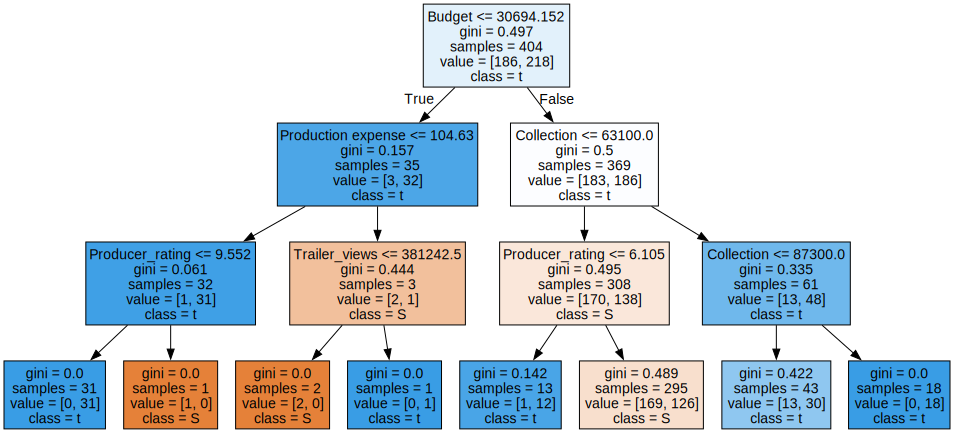

In [42]:
from sklearn.tree import export_graphviz
import graphviz
from sklearn import tree


dot_data = tree.export_graphviz(clftree, out_file=None, 
                                feature_names= X_train.columns.tolist(),  
                                class_names='Start_Tech_Oscar',
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

How to select which features for splitting? 

- **Gini index** (from CART algo): a measure of how impure the splitting is. It helps to determine the optimal splits by minimizing impurity. From a bunch of original features, we observe that features such as `Budget`, `Collection`, `Producer_rating`, `Trailer_views`, and `Producer_expense` are chosen to ensure each split results in a homegeneous node.
CART algorithm calculates the Gini impurity for all possible splits and selects the one with the lowest Gini index.
This process is repeated recursively to build the tree until stopping criteria are met (e.g., maximum depth, minimum samples per leaf). 

## Model evaluation - Confusion matrix 

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [44]:
confusion_matrix = confusion_matrix(y_train, y_train_pred)

In [45]:
accuracy_score(y_test, y_test_pred)

0.5490196078431373

A confusion matrix is the basis of all performance metrics for models with a categorical response. 

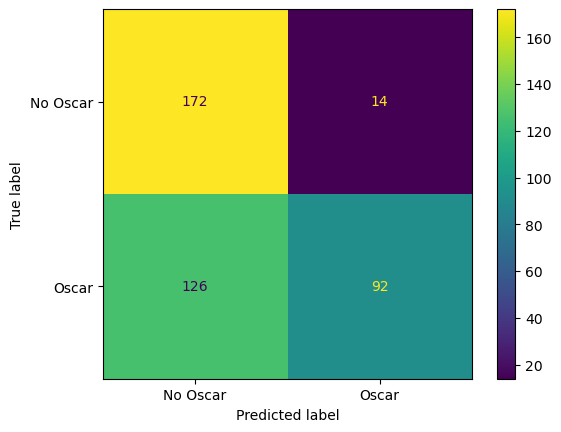

In [46]:
# visualize confusion matrix with sklearn metrics
# define matrix and create labels
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, 
                                    display_labels = ["No Oscar", "Oscar"])

# display matrix
cm_display.plot()
plt.show()

1. True positive - 172: The movie did not win Oscar and the model predicted they would not too.
2. False positive - 126: The movie won Oscar, but the model predicted they would not.
3. True negative - 92: The movie won Oscar and the model predicted they would.
4. False negative - 14: The movie did not won Oscar, but the model predicted they would.

In [47]:
dfFeatures = pd.DataFrame({'Features':X_train.columns.tolist(),'Importances':clftree.feature_importances_})
dfFeatures.sort_values(by='Importances',ascending=False).head(5)

,Features,Importances
15,Collection,0.385109
3,Budget,0.295736
8,Producer_rating,0.221625
1,Production expense,0.060880
10,Trailer_views,0.036649


What is the best feature that affect most significantly to decision-making process of the tree model? 

**Importance Score**: if a feature has a higher score, it makes highest contributions to the model. 

NOTE: 
- The top feature in a decision tree is crucial for the initial split.
- The top feature doesn't always have the highest importance score in the entire tree.
- Feature importance is a cumulative measure of a feature's contribution to impurity reduction across all splits.
- To understand feature contributions, look at the overall importance scores.